## [OpenCV-Python Tutorial] Clustering

In this notebook. we will learn how to use [`cv2.kmeans()`](http://docs.opencv.org/2.4/modules/core/doc/clustering.html#kmeans) function in OpenCV for data clustering

---

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

### 1. Data with Only One Feature

We can take our t-shirt problem where you use only height of people to decide the size of t-shirt.

So start by creating data and plot in Matplotlib

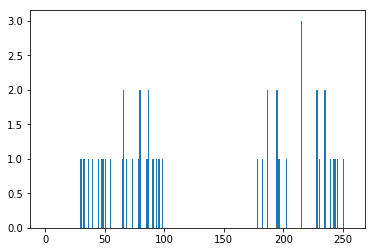

In [12]:
# Generate 25 integers between 25 to 100
x = np.random.randint(25, 100, 25)
# Generate 25 integers between 175 to 255
y = np.random.randint(175, 255, 25)
# Concat two integer lists
z = np.hstack((x, y))
z = z.reshape((50, 1)).astype('float32')

_ = plt.hist(z, 256, [0, 256])

Now we apply K-Means function. Before that we need to specify `criteria` and `flags`

In [15]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
# cv2.kmeans(data, K, criteria, attempts, flags)
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)

Let's check the outputs of `cv2.kmeans`

In [17]:
print compactness

24469.599887


In [18]:
labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [19]:
centers

array([[  64.51999664],
       [ 215.83999634]], dtype=float32)

Now plot A in Red color and B in Blue color and their centroids in Yellow color.

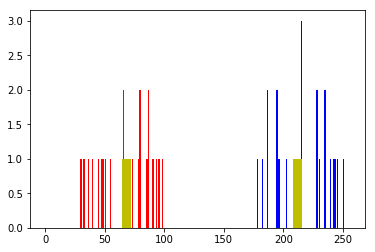

In [21]:
# Split the data to different clusters depending on their labels
A = z[labels==0]
B = z[labels==1]

# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
_ = plt.hist(A, 256, [0, 256], color = 'r')
_ = plt.hist(B, 256, [0, 256], color = 'b')
_ = plt.hist(centers, 32, [0,256], color = 'y')

### 2. Data with Multiple Features

Now, we will take both height and weight, i.e. two features

![IMG](../images/oc_feature_representation.jpg)

Start by creating data points and plot in Matplotlib

In [53]:
# (25, 2) points between 25 and 50
X = np.random.randint(25,50,(25,2))
# (25, 2) points between 60 and 85
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X, Y)).astype('float32')

In [28]:
print X

[[49 46]
 [26 44]
 [41 45]
 [29 48]
 [46 31]
 [30 31]
 [29 36]
 [47 47]
 [38 45]
 [30 36]
 [38 49]
 [39 46]
 [41 35]
 [46 25]
 [39 28]
 [29 34]
 [47 42]
 [38 35]
 [39 27]
 [35 43]
 [39 35]
 [30 28]
 [41 28]
 [38 42]
 [40 42]]


In [29]:
print Z.shape

(50, 2)


Draw plot with [`plt.scatter`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

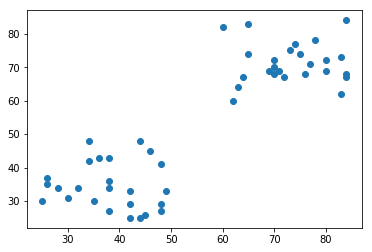

In [57]:
# Make a scatter plot of x vs y
# plt.scatter(x, y)
plt.scatter(Z[:,0], Z[:,1])

In [55]:
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
compactness, label, center=cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.flatten()==0]
B = Z[label.flatten()==1]

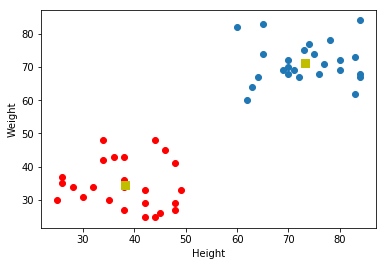

In [56]:
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
# s : size of plot
# c : color
# marker : marker style
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

### Practice : Color Quantization

Color Quantization is the process of reducing number of colors in an image.
One reason to do so is to reduce the memory.

There are 3 features R, G, B.
So we need to reshape the image to an array of Mx3 size (M is number of pixels in image).
After clustering, we apply centroid values (it is also R, G, B) to all pixels.

![IMG](../images/oc_color_quantization.jpg)

(384, 512, 3)


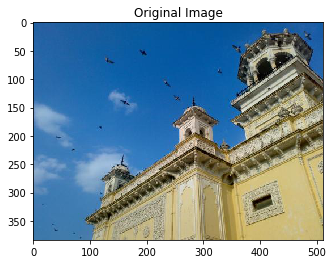

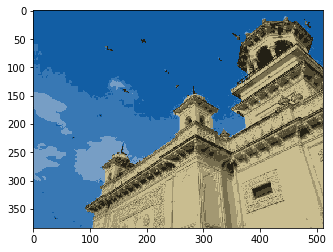

In [45]:
img = cv2.imread('../images/home.jpg')

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Flatten images
Z = img.reshape((-1,3))
# Convert to np.float32
Z = np.float32(Z)

# ===================== YOUR CODE HERE =====================
#
# ==========================================================

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Plot quantized image
plt.figure()
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

#### Reference

Please see the following official tutorials for more detailed explanation.
- [K-Means Clustering - OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)